<a href="https://colab.research.google.com/github/BettySanchez7/AirDataMx/blob/main/AirDataMx/Notebooks/MODULO%205/PerceptonMultiplica/DatosCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

CARGAMOS LOS DATOS

In [2]:
url = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/CO_mensual.csv"
url2 ="https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/SO2_mensual.csv"
url3 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/PM10_mensual.csv"
url4 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/O3_mensual.csv"
url5 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/NO2_mensual.csv"
df = pd.read_csv(url2,usecols=[1])
df2 = pd.read_csv(url,usecols=[2])
df3 = pd.read_csv(url,usecols=[3])
df4 = pd.read_csv(url,usecols=[4])
df5 = pd.read_csv(url,usecols=[5])

In [3]:
df = df.values
df = df.astype('float32')
df2 = df2.values
df2 = df2.astype('float32')
df3 = df3.values
df3 = df3.astype('float32')
df4 = df4.values
df4 = df4.astype('float32')
df5 = df5.values
df5 = df5.astype('float32')

In [4]:
train_size = int(len(df)*.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:],df[train_size:len(df),:]
print(len(train),len(test))

128 64


In [5]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [6]:
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

Epoch 1/800
52/52 - 19s - loss: 13.4546
Epoch 2/800
52/52 - 0s - loss: 3.3522
Epoch 3/800
52/52 - 0s - loss: 2.9449
Epoch 4/800
52/52 - 0s - loss: 2.8018
Epoch 5/800
52/52 - 0s - loss: 2.5356
Epoch 6/800
52/52 - 0s - loss: 2.4595
Epoch 7/800
52/52 - 0s - loss: 2.2988
Epoch 8/800
52/52 - 0s - loss: 2.3444
Epoch 9/800
52/52 - 0s - loss: 2.2466
Epoch 10/800
52/52 - 0s - loss: 2.1333
Epoch 11/800
52/52 - 0s - loss: 2.1766
Epoch 12/800
52/52 - 0s - loss: 2.0906
Epoch 13/800
52/52 - 0s - loss: 2.1060
Epoch 14/800
52/52 - 0s - loss: 2.1763
Epoch 15/800
52/52 - 0s - loss: 2.2251
Epoch 16/800
52/52 - 0s - loss: 2.1680
Epoch 17/800
52/52 - 0s - loss: 1.9432
Epoch 18/800
52/52 - 0s - loss: 2.0174
Epoch 19/800
52/52 - 0s - loss: 1.9393
Epoch 20/800
52/52 - 0s - loss: 1.9221
Epoch 21/800
52/52 - 0s - loss: 1.8567
Epoch 22/800
52/52 - 0s - loss: 1.9391
Epoch 23/800
52/52 - 0s - loss: 1.9666
Epoch 24/800
52/52 - 0s - loss: 2.0595
Epoch 25/800
52/52 - 0s - loss: 1.8084
Epoch 26/800
52/52 - 0s - loss: 

In [8]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 0.01 MSE (0.08 RMSE)
Resultado del test: 14.89 MSE (3.86 RMSE)


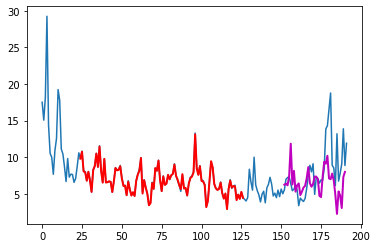

In [9]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 12.8650
Epoch 2/800
52/52 - 0s - loss: 2.5384
Epoch 3/800
52/52 - 0s - loss: 2.4207
Epoch 4/800
52/52 - 0s - loss: 2.4551
Epoch 5/800
52/52 - 0s - loss: 2.2635
Epoch 6/800
52/52 - 0s - loss: 2.6127
Epoch 7/800
52/52 - 0s - loss: 2.2332
Epoch 8/800
52/52 - 0s - loss: 2.0878
Epoch 9/800
52/52 - 0s - loss: 2.3140
Epoch 10/800
52/52 - 0s - loss: 2.2996
Epoch 11/800
52/52 - 0s - loss: 2.0309
Epoch 12/800
52/52 - 0s - loss: 2.1128
Epoch 13/800
52/52 - 0s - loss: 2.1296
Epoch 14/800
52/52 - 0s - loss: 1.9437
Epoch 15/800
52/52 - 0s - loss: 2.0842
Epoch 16/800
52/52 - 0s - loss: 1.9302
Epoch 17/800
52/52 - 0s - loss: 1.8699
Epoch 18/800
52/52 - 0s - loss: 1.8474
Epoch 19/800
52/52 - 0s - loss: 2.0290
Epoch 20/800
52/52 - 0s - loss: 1.9988
Epoch 21/800
52/52 - 0s - loss: 1.8502
Epoch 22/800
52/52 - 0s - loss: 1.7883
Epoch 23/800
52/52 - 0s - loss: 2.1309
Epoch 24/800
52/52 - 0s - loss: 1.8921
Epoch 25/800
52/52 - 0s - loss: 2.1628
Epoch 26/800
52/52 - 0s - 

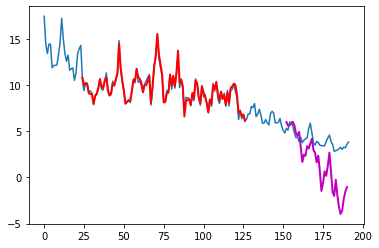

In [10]:
train_size = int(len(df2)*.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:],df2[train_size:len(df2),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df2)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/400
52/52 - 1s - loss: 34.9430
Epoch 2/400
52/52 - 0s - loss: 5.4005
Epoch 3/400
52/52 - 0s - loss: 5.3065
Epoch 4/400
52/52 - 0s - loss: 4.9891
Epoch 5/400
52/52 - 0s - loss: 4.9407
Epoch 6/400
52/52 - 0s - loss: 4.7456
Epoch 7/400
52/52 - 0s - loss: 4.9104
Epoch 8/400
52/52 - 0s - loss: 4.0588
Epoch 9/400
52/52 - 0s - loss: 3.6846
Epoch 10/400
52/52 - 0s - loss: 3.4263
Epoch 11/400
52/52 - 0s - loss: 3.5803
Epoch 12/400
52/52 - 0s - loss: 3.1771
Epoch 13/400
52/52 - 0s - loss: 3.2914
Epoch 14/400
52/52 - 0s - loss: 3.0108
Epoch 15/400
52/52 - 0s - loss: 3.9857
Epoch 16/400
52/52 - 0s - loss: 3.2183
Epoch 17/400
52/52 - 0s - loss: 3.0954
Epoch 18/400
52/52 - 0s - loss: 2.8055
Epoch 19/400
52/52 - 0s - loss: 3.3321
Epoch 20/400
52/52 - 0s - loss: 3.1331
Epoch 21/400
52/52 - 0s - loss: 2.5383
Epoch 22/400
52/52 - 0s - loss: 2.4297
Epoch 23/400
52/52 - 0s - loss: 2.6239
Epoch 24/400
52/52 - 0s - loss: 2.5026
Epoch 25/400
52/52 - 0s - loss: 2.4156
Epoch 26/400
52/52 - 0s - 

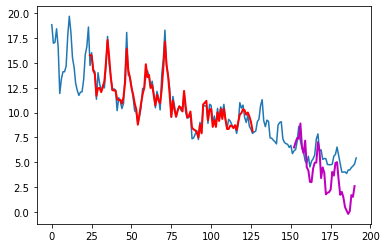

In [11]:
train_size = int(len(df3)*.67)
test_size = len(df3) - train_size
train, test = df3[0:train_size,:],df3[train_size:len(df3),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df3)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df3)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/400
52/52 - 1s - loss: 31.9571
Epoch 2/400
52/52 - 0s - loss: 7.4484
Epoch 3/400
52/52 - 0s - loss: 7.0051
Epoch 4/400
52/52 - 0s - loss: 6.0793
Epoch 5/400
52/52 - 0s - loss: 5.6676
Epoch 6/400
52/52 - 0s - loss: 5.2517
Epoch 7/400
52/52 - 0s - loss: 5.0557
Epoch 8/400
52/52 - 0s - loss: 4.5600
Epoch 9/400
52/52 - 0s - loss: 4.2770
Epoch 10/400
52/52 - 0s - loss: 4.0534
Epoch 11/400
52/52 - 0s - loss: 3.9451
Epoch 12/400
52/52 - 0s - loss: 3.8278
Epoch 13/400
52/52 - 0s - loss: 3.7870
Epoch 14/400
52/52 - 0s - loss: 3.8200
Epoch 15/400
52/52 - 0s - loss: 3.3961
Epoch 16/400
52/52 - 0s - loss: 3.0014
Epoch 17/400
52/52 - 0s - loss: 3.0329
Epoch 18/400
52/52 - 0s - loss: 2.9617
Epoch 19/400
52/52 - 0s - loss: 3.9761
Epoch 20/400
52/52 - 0s - loss: 3.1630
Epoch 21/400
52/52 - 0s - loss: 2.6105
Epoch 22/400
52/52 - 0s - loss: 2.7327
Epoch 23/400
52/52 - 0s - loss: 2.5882
Epoch 24/400
52/52 - 0s - loss: 2.9689
Epoch 25/400
52/52 - 0s - loss: 2.8581
Epoch 26/400
52/52 - 0s - 

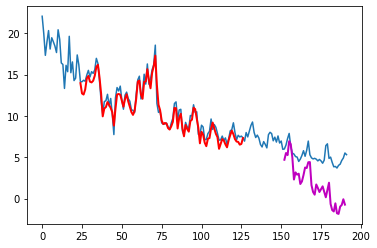

In [12]:
train_size = int(len(df4)*.67)
test_size = len(df4) - train_size
train, test = df4[0:train_size,:],df4[train_size:len(df4),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df4)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df4)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/400
52/52 - 1s - loss: 21.2753
Epoch 2/400
52/52 - 0s - loss: 4.6738
Epoch 3/400
52/52 - 0s - loss: 4.4269
Epoch 4/400
52/52 - 0s - loss: 4.2635
Epoch 5/400
52/52 - 0s - loss: 3.8176
Epoch 6/400
52/52 - 0s - loss: 3.5029
Epoch 7/400
52/52 - 0s - loss: 2.9286
Epoch 8/400
52/52 - 0s - loss: 2.6739
Epoch 9/400
52/52 - 0s - loss: 2.6710
Epoch 10/400
52/52 - 0s - loss: 2.4384
Epoch 11/400
52/52 - 0s - loss: 2.2833
Epoch 12/400
52/52 - 0s - loss: 2.1906
Epoch 13/400
52/52 - 0s - loss: 1.9289
Epoch 14/400
52/52 - 0s - loss: 1.7729
Epoch 15/400
52/52 - 0s - loss: 2.1108
Epoch 16/400
52/52 - 0s - loss: 2.3319
Epoch 17/400
52/52 - 0s - loss: 1.9413
Epoch 18/400
52/52 - 0s - loss: 2.0388
Epoch 19/400
52/52 - 0s - loss: 2.3255
Epoch 20/400
52/52 - 0s - loss: 1.9290
Epoch 21/400
52/52 - 0s - loss: 1.8325
Epoch 22/400
52/52 - 0s - loss: 1.9243
Epoch 23/400
52/52 - 0s - loss: 1.7197
Epoch 24/400
52/52 - 0s - loss: 1.7960
Epoch 25/400
52/52 - 0s - loss: 1.9989
Epoch 26/400
52/52 - 0s - 

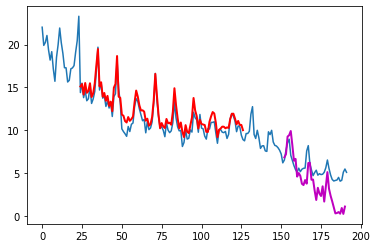

In [13]:
train_size = int(len(df5)*.67)
test_size = len(df5) - train_size
train, test = df5[0:train_size,:],df5[train_size:len(df5),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df5)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df5)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df5)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df5)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()